In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

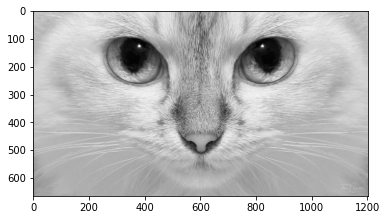

In [30]:
img = plt.imread('img/image.jpg')
imagegray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
np.resize(imagegray, (100, 100))
plt.figure(facecolor='white')
plt.imshow(imagegray, cmap='gray')

In [31]:
#Fungsi menampilkan gambar
def display(asal, hasil):
    plt.figure(figsize=(10,10))
    plt.imshow(asal, cmap="gray")
    #Script di atas berfungsi untuk menampilkan gambar yang telah di ubah yaitu dengan menggunakan variabel asal, kemudian script cmap = "gray" berfungsi untuk mengubah tampilan citra menjadi gray atau abu-abu
    plt.subplot(1,2,2)#gambar tersebut memiliki 1 baris, 2 kolom, dan plot ini adalah plot Kedua.
    plt.imshow(hasil, cmap="gray")
    #Script di atas berfungsi untuk menampilkan gambar yang telah di ubah yaitu dengan menggunakan variabel hasil, kemudian script cmap = "gray" berfungsi untuk mengubah tampilan citra menjadi gray atau abu-abu

In [32]:
def show(img1, img2,img3,img4):
    plt.figure(figsize=(15,10))#Figure adalah kontainer top level untuk menampung segala elemen plot pada visualisasi. Figure sendiri bisa kita ibaratkan sebagai kanvas saat kita melukis.
    plt.subplot(2,2,1) #Fungsi subplots() mengambil tiga argumen yang menjelaskan layout gambar.Layout diatur dalam baris dan kolom, yang diwakili oleh argumen pertama dan kedua. Argumen ketiga mewakili indeks plot saat ini.
    plt.title('Aproximation')
    plt.imshow(img1, cmap='gray')
    plt.subplot(2,2,2)#gambar tersebut memiliki 2 baris, 2 kolom, dan plot ini adalah plot Kedua.
    plt.title('Horizontal Detail')
    plt.imshow(img2, cmap='gray')
    plt.subplot(2,2,3)#plot ini berada pada baris ke 2 kolom pertama
    plt.title('Vertikal Detail')
    plt.imshow(img3, cmap='gray')
    plt.subplot(2,2,4)#plot ini berada pada baris ke 2 kolom kedua
    plt.title('Diagonal Detail')
    plt.imshow(img4, cmap='gray')

# 1. DEKOMPOSISI WAVELET 

In [33]:
#Kernel Haar
lp_d = np.array([0.7071067811865476, 0.7071067811865476]) #koefisien haar untuk low-pass dekomposisi
hp_d = np.array([-0.7071067811865476, 0.7071067811865476]) #koefisien haar untuk High-pass dekomposisi
ld_r = np.array([0.7071067811865476, 0.7071067811865476]) #koefisien haar untuk low-pass Rekonstruksi
hp_r = np.array([0.7071067811865476, -0.7071067811865476]) #koefisien haar untuk high-pass Rekonstruksi

In [34]:
#Fungsi untuk memberi padding pada citra sebelum melakukan konvolusi
def padding (citra, n_pad):
    n_pad = len(n_pad)-1
    padd = np.pad (citra , [0, n_pad], 'constant')
    return padd

In [35]:
#fungsi untuk melakukan konvolusi terhadap baris
def konvBaris (matriks, filter, citra):
    row, col =  citra.shape #berfungsi untuk inisialisasi dari variabel baris dan kolom
    konvol1 = np.zeros ((row,col)) #berfungsi untuk membuat matriks 0 dengan indeks baris dan kolom
    for i in range (len(konvol1)):  
        for j in range (len(konvol1[i])):
            for x in range (len(filter)):
                konvol1[i][j] += (matriks[i][j+x]*filter[x])
    return konvol1 #berfungsi untuk mengembalikan nilai dari variabael konvol1

In [36]:
#fungsi untuk melakukan konvolusi terhadap kolom
def konvKolom (matriks, filter, citra):
    row, col =  citra.shape #script ini digunakan untuk inisialisasi dari variabel baris dan kolom
    konvol1 = np.zeros ((row,col)) #script ini berfungsi untuk membuat Matriks 0 dengan indeks baris dan kolom
    for i in range (len(konvol1)):
        for j in range (len(konvol1[i])):
            for x in range (len(filter)):
                konvol1[i][j] += (matriks[i+x][j]*filter[x])
    return konvol1 #berfungsi mengembalikan nilai dari variabael konvol1

In [37]:
#fungsi untuk melakukan downsampling pada bagian kolom, dan yg diambil hanya indeks yang genap saja
def downKolom(kernel):
    row,col=kernel.shape #Berfungsi untuk menginialisasi baris dan kolom
    row=int(row)
    col=int(col/2)
    kernel1 = np.zeros((row,col)) #Berfungsi untuk membuat matriks yanng bernilai 0 dengan indeks baris dan kolom
    for i in range(row):
        index = 0 #berfungsi memberi nilai index sama dengan nol
        for j in range(col):
            kernel1[i][j] = kernel[i][index]
            index +=2
    return kernel1 #berfungsi mengembalikan nilai dari variabael kernel1

In [38]:
#fungsi untuk melakukan downsampling pada bagian baris, dan yang diambil hanya indeks yang genap saja
def downBaris(kernel):
    row,col=kernel.shape #Berfungsi untuk menginialisasi baris dan kolom
    row=int(row/2)
    col=int(col)
    kernel1 = np.zeros((row,col)) #Berfungsi untuk membuat matriks yanng bernilai 0 dengan indeks baris dan kolom
    index = 0 #berfungsi untuk memberi nilai index sama dengan nol
    for i in range(row): #Berfungsi untuk melakukan perulangan untuk baris
        for j in range(col): #Berfungsi untuk melakukan perulangan untuk kolom
            kernel1[i][j] = kernel[index][j]
        index += 2
    return kernel1 #berfungsi mengembalikan nilai dari variabael kernel1

In [39]:
#fungsi untuk melakukan dekomposisi citra
def dekomposisi (citra, kernel1, kernel2):
    pad = padding (citra, kernel1)
    konvolusi = konvBaris(pad, kernel1, citra)
    downsampling = downKolom (konvolusi)
    padd = padding (downsampling, kernel2)
    konvolusi2 = konvKolom(padd,kernel2, downsampling)
    
    return downBaris (konvolusi2) #Berfungsi untuk mengembalikan nilai dari downBaris(Konvolusi2)

In [40]:
#fungsi untuk proses hasil bagi dari masing-masing nilai matriks
def level_1 (LL, LH, HL, HH):
    baris_1 = np.concatenate ((LL, HL), axis = 1)#Fungsi concatenate merupakan proses penggabungan array yang satu dengan array lainnya
    baris_2 = np.concatenate ((LH, HH), axis = 1)
    return np.concatenate ((baris_1, baris_2), axis=0)

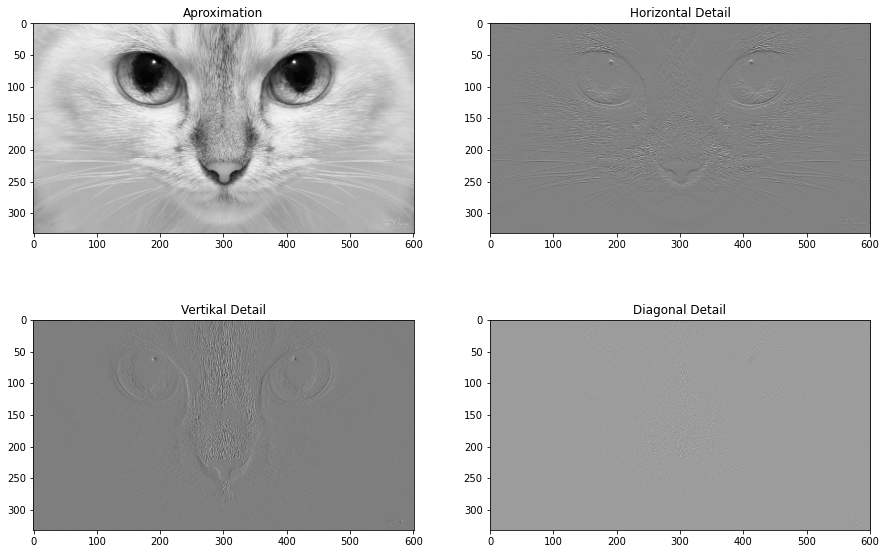

In [44]:
#Berfungsi untuk menyimpan nilai dari dekomposisi dengan kernel haar
LL = dekomposisi(imagegray, lp_d, lp_d)
LH = dekomposisi(imagegray, lp_d, hp_d)
HL = dekomposisi(imagegray, hp_d, lp_d)
HH = dekomposisi(imagegray, hp_d, hp_d)
show(LL,LH,HL,HH)

# 2. REKONSTRUKSI WAVELET

In [45]:
#Fungsi untuk melakukan rekonstruksi citra
def rekonstruksi(LL, LH, HL, HH):
    tinggi_img, lebar_img = LL.shape #script ini berfungsi mengambil ukuran citra dekomposisi
    t = tinggi_img*2; l = lebar_img*2 #script ini berfungsi menentukan ukuran citra rekonstruksi
    image = np.zeros([t,l]) #script ini berfungsi sebagai wadah citra hasil rekonstruksi
    LL2, LH2 = np.zeros([t,l]), np.zeros([t,l]) #script ini berfungsi sebagai wadah untuk melakukan rekonstruksi
    HL2, HH2 = np.zeros([t,l]), np.zeros([t,l]) #script ini berfungsi sebagai wadah untuk melakukan rekonstruksi
    
    #memberikan ruang kosong pada matrix
    for i in range(0,t,2):
        for j in range(0,l,2):
            LL2[i][j] = LL[int(i/2)][int(j/2)]
            LH2[i][j] = LH[int(i/2)][int(j/2)]
            HL2[i][j] = HL[int(i/2)][int(j/2)]
            HH2[i][j] = HH[int(i/2)][int(j/2)]
    
    #mengisi baris yang kosong pada matrix citra
    for i in range(1,t,2):
        for j in range(l):
            LL2[i][j]  = LL2[i-1][j]
            LH2[i][j] -= LH2[i-1][j]
            HL2[i][j]  = HL2[i-1][j]
            HH2[i][j] -= HH2[i-1][j]
    #mengisi kolom yang kosong pada matrix citra
    for i in range(t):
        for j in range(1,l,2):
            LL2[i][j]  = LL2[i][j-1]
            LH2[i][j]  = LH2[i][j-1]
            HL2[i][j] -= HL2[i][j-1]
            HH2[i][j] -= HH2[i][j-1]
    
    #penggabungan LL, LH, HL, HH ke dalam satu matrix citra
    for i in range(t):
        for j in range(l):
            image[i][j] += (LL2[i][j]+LH2[i][j]+HL2[i][j]+HH2[i][j])
    return image #berfungsi untuk mengembalikan nilai berupa gambar

In [46]:
hasil = rekonstruksi (LL, LH, HL, HH)
#membuat variabelhasil yang akan digunakan sebagai tempat menyimpan hasil dari pencarian nilai dari LL, LH, HL dan HH
#hasil ini memiliki ukuran yang sama dengan rekonstruksi


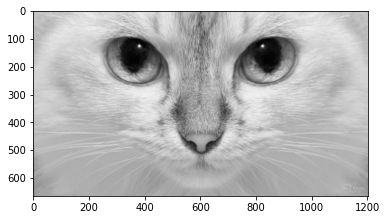

In [47]:
plt.imshow(hasil, cmap='gray') #Script ini merupakan method show() yang akan digunakan 
#untuk menampilkan image/citra yang telah di panggil/inputkan dan script ini berfungsi 
#menampilkan gambar hasil dengan skala abu-abu
